## Pour ceux qui veulent approfondir le travail réalisé dans le cadre de cette UE en lieu et place de l’initiation à SQL, nous vous proposons de développer trois axes d’analyse pour le jeu de données : les données manquantes, l’évolution des rapports homme/femme au sein des disciplines universitaires, et les techniques de scraping pour conclure.

### 1.  Concernant les données manquantes, nous vous proposons de faire une heatmap (la couleur dépendant du pourcentage de données manquantes), en choisissant « statut » comme variable en « abscisse » : vous contrastez ainsi les niveaux « enCours » et « soutenue ».

In [2]:
import pandas as pd
import numpy as np
import datetime
data=pd.read_csv('PhD_v2.csv', on_bad_lines='skip',low_memory=False)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447644 entries, 0 to 447643
Data columns (total 18 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447644 non-null  object 
 1   Identifiant auteur                        317655 non-null  object 
 2   Titre                                     447635 non-null  object 
 3   Directeur de these                        447629 non-null  object 
 4   Directeur de these (nom prenom)           447629 non-null  object 
 5   Identifiant directeur                     447644 non-null  object 
 6   Etablissement de soutenance               447640 non-null  object 
 7   Identifiant etablissement                 430559 non-null  object 
 8   Discipline                                447639 non-null  object 
 9   Statut                                    447644 non-null  object 
 10  Date de premiere ins

In [3]:
df_statut=data.copy()
df_statut.loc[df_statut['Statut']=='soutenue','Statut: soutenue']='soutenue'
df_statut.loc[df_statut['Statut']=='enCours','Statut: enCours']='enCours'
print(   df_statut['Identifiant auteur'].isnull().sum())


129989


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.matrix as smatrix
#df_statut.drop( 'Statut',axis=1,inplace=True)
#df_statut.info()
print(df_statut['Statut: soutenue'].isnull().sum())
print(df_statut['Statut: enCours'].isnull().sum())

66329
381315


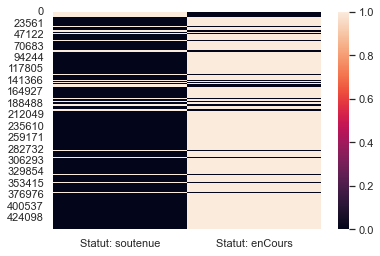

In [5]:
sns.set()
columns=['Statut: soutenue','Statut: enCours']
sns.heatmap(df_statut[columns].isnull() )
plt.show()

In [6]:
row=df_statut.loc[ (df_statut['Statut']=='enCours') &  (~df_statut['Date de premiere inscription en doctorat'].isnull())  ]

print( len(row))

63976


In [7]:
df_heat=pd.DataFrame()

for x in df_statut.columns:
        
    missing_value_soutenue=len( df_statut.loc[ (df_statut['Statut']=='soutenue') & (df_statut[x].isnull())  ] )
    df_heat.loc['Statut: soutenue',x]=missing_value_soutenue/381315 *1e2
    
    missing_value_enCours=len( df_statut.loc[ (df_statut['Statut']=='enCours') & (df_statut[x].isnull())  ] )  
    df_heat.loc['Statut: enCours',x]=missing_value_enCours/66329*1e2
 
    
df_heat.head()

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,Date de premiere inscription en doctorat,Date de soutenance,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Statut: soutenue,Statut: enCours
Statut: soutenue,0.0,16.753340,0.000000,0.002885,0.002885,0.0,0.001049,4.480285,0.000787,0.0,100.000000,0.031208,0.031208,0.033044,0.0,0.0,0.0,0.046418,0.0,100.0
Statut: enCours,0.0,99.663797,0.013569,0.006031,0.006031,0.0,0.000000,0.001508,0.003015,0.0,3.547468,85.372914,85.372914,95.944459,0.0,0.0,0.0,0.000000,100.0,0.0


<AxesSubplot:>

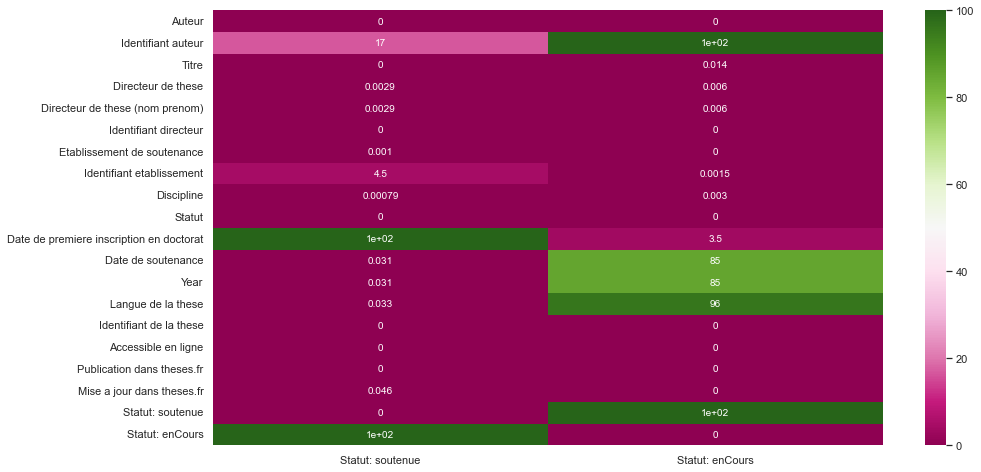

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(df_heat. transpose(),xticklabels=True, yticklabels=True,annot=True, annot_kws={'size': 10},cmap="PiYG")



####  2.1Concernant l’évolution des genres au sein des disciplines, l’exercice consiste à trouver les genres des auteurs avec la librairie Python gender guesser.

In [9]:
import gender_guesser.detector as gender

In [10]:
d = gender.Detector()
d.get_gender(u"Bob")

'male'

In [11]:
data1=pd.read_csv('PhD_v3.csv', on_bad_lines='skip',low_memory=False)
print(data1.info())
print(data1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Unnamed: 0                                448047 non-null  int64  
 1   Auteur                                    448047 non-null  object 
 2   Identifiant auteur                        317700 non-null  object 
 3   Titre                                     448040 non-null  object 
 4   Directeur de these                        448034 non-null  object 
 5   Directeur de these (nom prenom)           448034 non-null  object 
 6   Identifiant directeur                     448047 non-null  object 
 7   Etablissement de soutenance               448046 non-null  object 
 8   Identifiant etablissement                 430965 non-null  object 
 9   Discipline                                448047 non-null  object 
 10  Statut              

In [12]:
print( len( data1['Discipline_prÃ©di'].unique() ))
print( len( data.Discipline.unique() ))

15
24263


In [13]:
evo_displine=pd.pivot_table(data1.loc[:,['Year','Discipline_prÃ©di']], index='Year', columns='Discipline_prÃ©di', aggfunc=len, fill_value=0)
print( evo_displine.columns )
print( evo_displine.index )
print( evo_displine.head() )

Index(['Biologie', 'Droit et Science Politique', 'Economie Gestion',
       'Informatique', 'Langues et Litteratures',
       'Materiaux, Milieux et Chimie', 'Mathematiques et Informatique',
       'MathÃ©matiques', 'Medecine', 'Poubelle', 'Psychologie', 'SHS',
       'Science de l'ingÃ©nieur', 'Science de la Terre',
       'Sciences de l'education'],
      dtype='object', name='Discipline_prÃ©di')
Float64Index([1971.0, 1972.0, 1973.0, 1976.0, 1979.0, 1980.0, 1982.0, 1984.0,
              1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0,
              1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
              2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
              2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
              2017.0, 2018.0, 2019.0, 2020.0],
             dtype='float64', name='Year')
Discipline_prÃ©di  Biologie  Droit et Science Politique  Economie Gestion  \
Year                                     

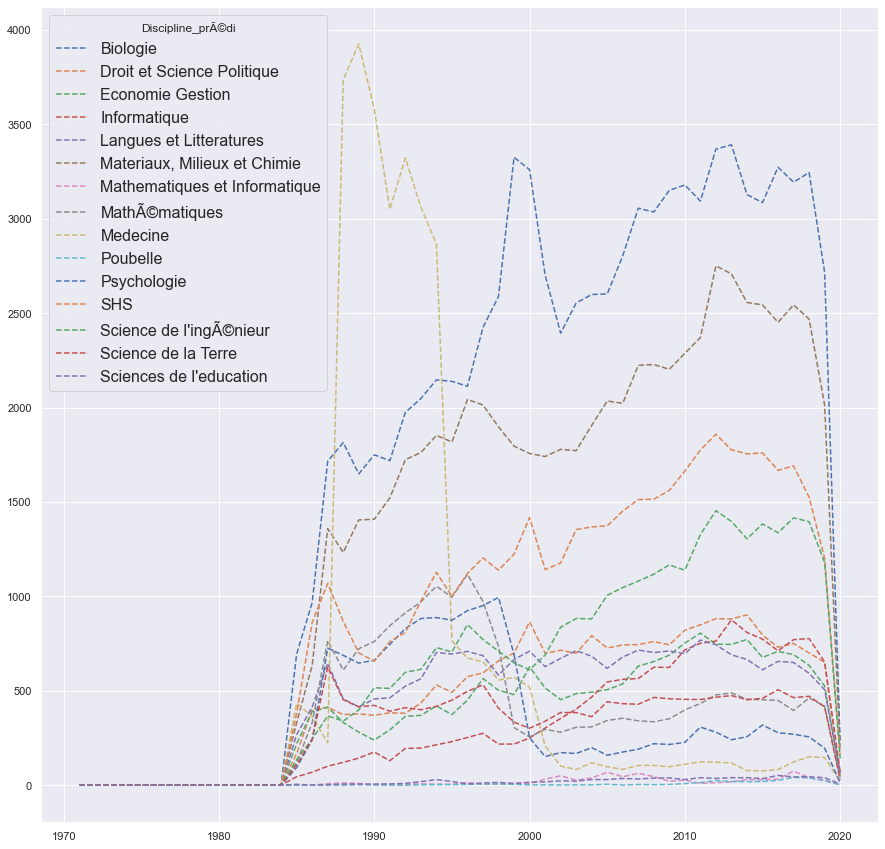

In [14]:
plt.figure(figsize=(15,15))
plt.plot(evo_displine,linestyle='--' )
plt.legend(evo_displine.columns, title=evo_displine.columns.name,prop={'size': 16})

plt.show()

In [55]:
evo_displine1=data1.groupby(data1['Year'],  as_index=True, sort=False, group_keys=True )['Discipline_prÃ©di'].value_counts() 
print( evo_displine1[2010])
print( evo_displine1.head())

Discipline_prÃ©di
Biologie                         3179
Materiaux, Milieux et Chimie     2288
SHS                              1664
Science de l'ingÃ©nieur          1139
Droit et Science Politique        821
Economie Gestion                  753
Informatique                      717
Langues et Litteratures           697
Science de la Terre               455
MathÃ©matiques                    399
Psychologie                       227
Medecine                          111
Sciences de l'education            30
Mathematiques et Informatique      27
Poubelle                            9
Name: Discipline_prÃ©di, dtype: int64
Year    Discipline_prÃ©di           
1993.0  Medecine                        3061
        Biologie                        2048
        Materiaux, Milieux et Chimie    1762
        SHS                              976
        MathÃ©matiques                   971
Name: Discipline_prÃ©di, dtype: int64


#### 2.2 Le croisement genre / discipline semble compromis. Chargez le jeu de données V3 et faites des « aera charts» pour décrire l’évolution des genres selon les nouvelles disciplines recodées

In [56]:
data1['Genre'].value_counts()

male             207639
female           156716
unknown           63822
andy               8481
mostly_male        6192
mostly_female      5197
Name: Genre, dtype: int64

In [77]:
Male_discip=data1.loc[data1['Genre']=='male',['Year','Discipline_prÃ©di']]
Female_discip=data1.loc[data1['Genre']=='female',['Year','Discipline_prÃ©di']]
print( len ( Male_discip['Discipline_prÃ©di'].unique() ) ) 
print( len (Female_discip['Discipline_prÃ©di'].unique() ) ) 
print(  Female_discip.head() )
Discinplin15=Female_discip['Discipline_prÃ©di'].unique()
print(  Discinplin15 )

15
15
      Year             Discipline_prÃ©di
1      NaN  Materiaux, Milieux et Chimie
8   2013.0                      Biologie
9   2011.0    Droit et Science Politique
15  2011.0                   Psychologie
16  2012.0                           SHS
['Materiaux, Milieux et Chimie' 'Biologie' 'Droit et Science Politique'
 'Psychologie' 'SHS' 'Economie Gestion' 'Langues et Litteratures'
 'Poubelle' 'Informatique' "Sciences de l'education" 'Science de la Terre'
 'Medecine' "Science de l'ingÃ©nieur" 'MathÃ©matiques'
 'Mathematiques et Informatique']


In [88]:
Evo_male_discip=Male_discip[[ 'Year','Discipline_prÃ©di' ] ].value_counts(normalize=False).reset_index()
Evo_male_discip.columns=['Year','Discipline_prÃ©di','count']

#Evo_med=Evo_male_discip.loc[Evo_male_discip['Discipline_prÃ©di']=='Medecine',['Year','count']].sort_values( by='Year',ascending = True)
#st=Evo_med.loc[ Evo_med['Year']==1985,'count']
#print( st.tolist()[0])

Evo_male_plot_discip= pd.DataFrame()

for x in Discinplin15 :
    year_count=[]
    print(x)
    temp=Evo_male_discip.loc[Evo_male_discip['Discipline_prÃ©di']==x,['Year','count']].sort_values( by='Year',ascending = True)
    for y in range(1972,2021,1):
        if  temp['Year'].isin([y]).any().any()==False:
            year_count.append( 0 )
        else :
            st=temp.loc[temp['Year']==y,'count'].tolist()[0]
            year_count.append( st )
 
    Evo_male_plot_discip[x]=year_count


Materiaux, Milieux et Chimie
Biologie
Droit et Science Politique
Psychologie
SHS
Economie Gestion
Langues et Litteratures
Poubelle
Informatique
Sciences de l'education
Science de la Terre
Medecine
Science de l'ingÃ©nieur
MathÃ©matiques
Mathematiques et Informatique


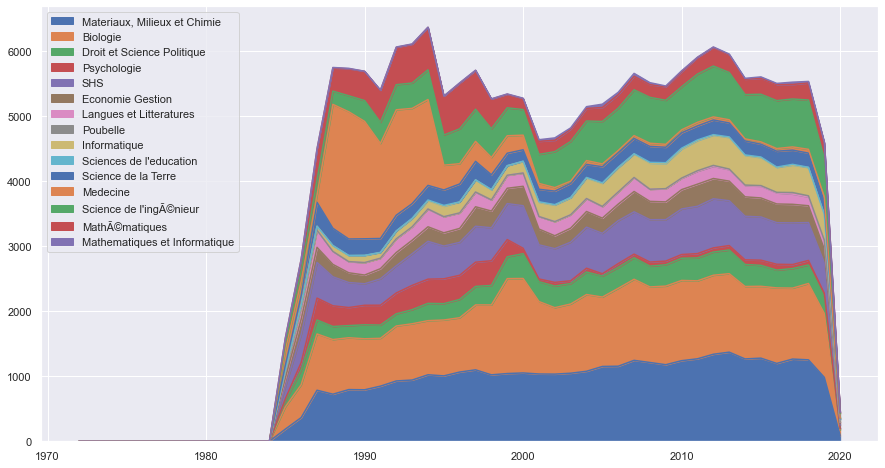

In [89]:
Evo_male_plot_discip.index=range(1972,2021,1)
Evo_male_plot_discip.plot.area()
plt.show()

In [90]:
Evo_female_discip=Female_discip[[ 'Year','Discipline_prÃ©di' ] ].value_counts(normalize=False).reset_index()
Evo_female_discip.columns=['Year','Discipline_prÃ©di','count']

#Evo_med=Evo_male_discip.loc[Evo_male_discip['Discipline_prÃ©di']=='Medecine',['Year','count']].sort_values( by='Year',ascending = True)
#st=Evo_med.loc[ Evo_med['Year']==1985,'count']
#print( st.tolist()[0])

Evo_female_plot_discip = pd.DataFrame()
 
for x in Discinplin15:
    year_count=[]
    print(x)
    temp=Evo_female_discip.loc[Evo_female_discip['Discipline_prÃ©di']==x,['Year','count']].sort_values( by='Year',ascending = True)
    for y in range(1972,2021,1):
        if  temp['Year'].isin([y]).any().any()==False:
            year_count.append( 0 )
        else :
            st=temp.loc[temp['Year']==y,'count'].tolist()[0]
            year_count.append( st )
 
    Evo_female_plot_discip[x]=year_count

Materiaux, Milieux et Chimie
Biologie
Droit et Science Politique
Psychologie
SHS
Economie Gestion
Langues et Litteratures
Poubelle
Informatique
Sciences de l'education
Science de la Terre
Medecine
Science de l'ingÃ©nieur
MathÃ©matiques
Mathematiques et Informatique


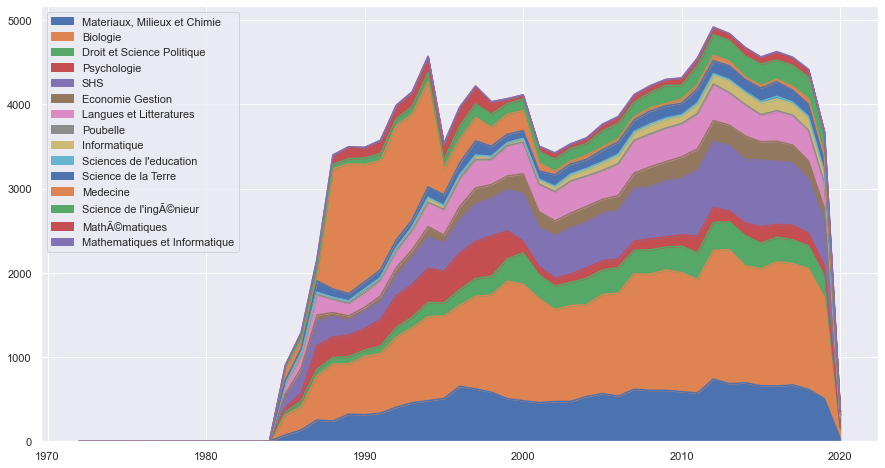

In [91]:
Evo_female_plot_discip.index=range(1972,2021,1)
Evo_female_plot_discip.plot.area()
plt.show()

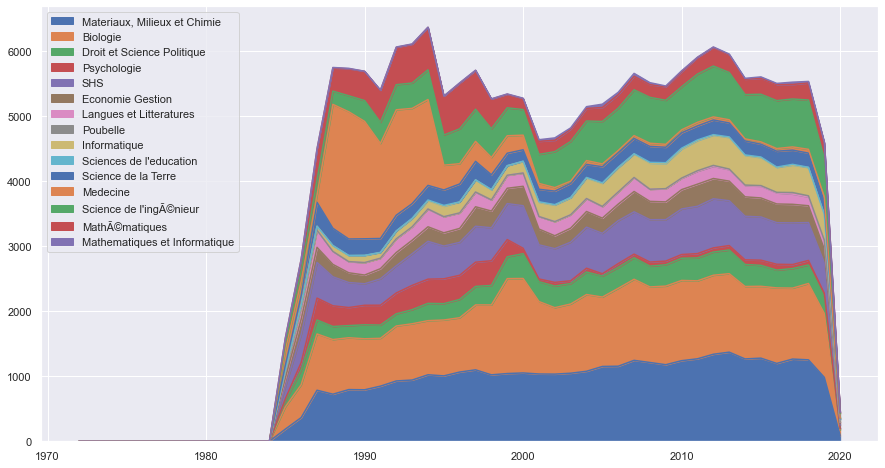

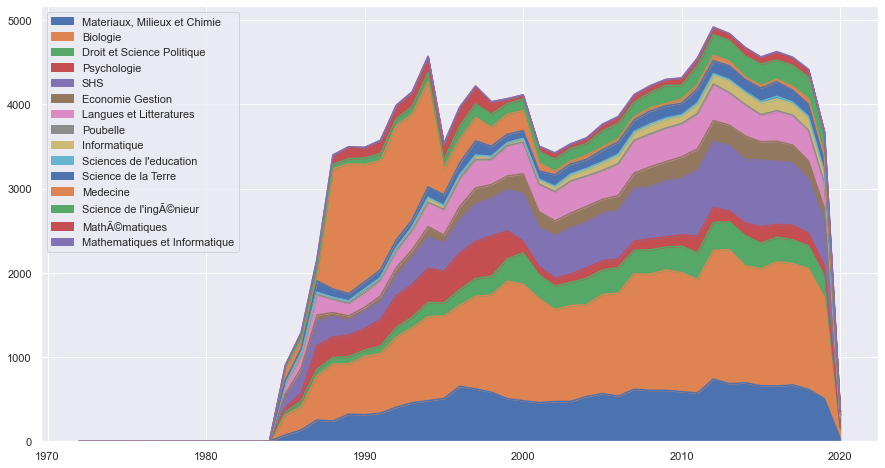

In [103]:
#fig,(ax1,ax2)=plt.subplots(1,2)

Evo_male_plot_discip.plot.area()
Evo_female_plot_discip.plot.area()

plt.show()

#### 2.3 Reproduisez l’analyse en regardant cette fois l’évolution des langues d’écriture en fonction des disciplines.

In [82]:
Lang5=data1.Langue_rec.unique()

array([nan, 'Français', 'Anglais', 'Autre', 'Bilingue'], dtype=object)

In [83]:
Male_lang=data1.loc[data1['Genre']=='male',['Year','Langue_rec']]
Female_lang=data1.loc[data1['Genre']=='female',['Year','Langue_rec']]
print( len ( Male_lang['Langue_rec'].unique() ) ) 
print( len (Female_lang['Langue_rec'].unique() ) ) 
print(  Female_lang.head() )
Lang5=Female_lang['Langue_rec'].unique()
print( Lang5)

5
5
      Year Langue_rec
1      NaN        NaN
8   2013.0        NaN
9   2011.0        NaN
15  2011.0        NaN
16  2012.0        NaN
[nan 'Français' 'Anglais' 'Autre' 'Bilingue']


In [92]:
Evo_male_lang=Male_lang[[ 'Year','Langue_rec' ] ].value_counts(normalize=False).reset_index()
Evo_male_lang.columns=['Year','Langue_rec','count']
 
Evo_male_plot_lang = pd.DataFrame()

for x in Lang5 :
    year_count=[]
    print(x)
    temp=Evo_male_lang.loc[Evo_male_lang['Langue_rec']==x,['Year','count']].sort_values( by='Year',ascending = True)
    for y in range(1972,2021,1):
        if  temp['Year'].isin([y]).any().any()==False:
            year_count.append( 0 )
        else :
            st=temp.loc[temp['Year']==y,'count'].tolist()[0]
            year_count.append( st )
 
    Evo_male_plot_lang[x]=year_count

nan
Français
Anglais
Autre
Bilingue


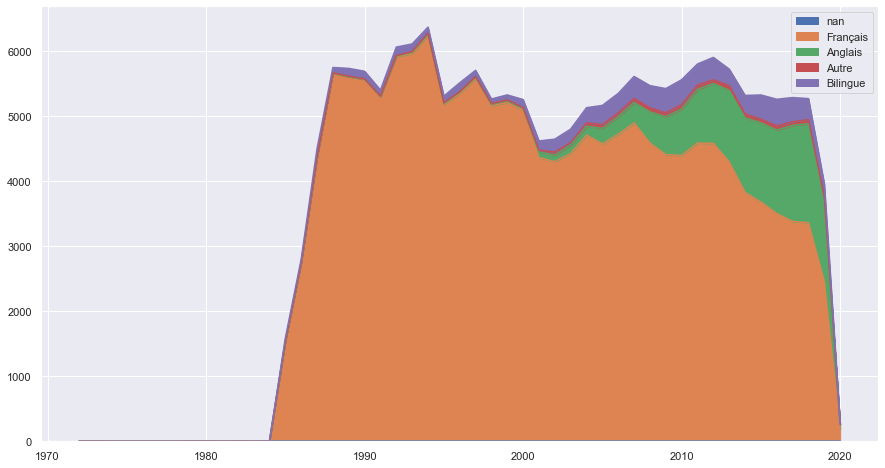

In [93]:
Evo_male_plot_lang.index=range(1972,2021,1)
Evo_male_plot_lang.plot.area()
plt.show()

In [94]:
Evo_female_lang=Female_lang[[ 'Year','Langue_rec' ] ].value_counts(normalize=False).reset_index()
Evo_female_lang.columns=['Year','Langue_rec','count']
 
Evo_female_plot_lang = pd.DataFrame()

for x in Lang5 :
    year_count=[]
    print(x)
    temp=Evo_female_lang.loc[Evo_female_lang['Langue_rec']==x,['Year','count']].sort_values( by='Year',ascending = True)
    for y in range(1972,2021,1):
        if  temp['Year'].isin([y]).any().any()==False:
            year_count.append( 0 )
        else :
            st=temp.loc[temp['Year']==y,'count'].tolist()[0]
            year_count.append( st )
 
    Evo_female_plot_lang[x]=year_count

nan
Français
Anglais
Autre
Bilingue


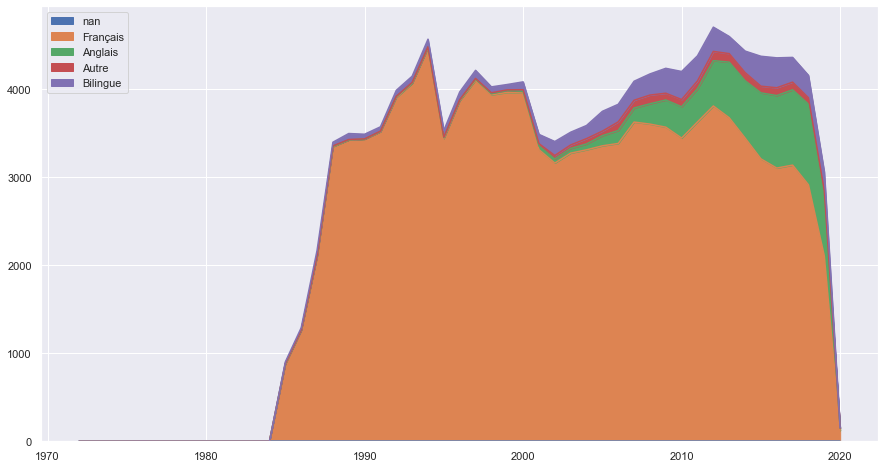

In [95]:
Evo_female_plot_lang.index=range(1972,2021,1)
Evo_female_plot_lang.plot.area()
plt.show()

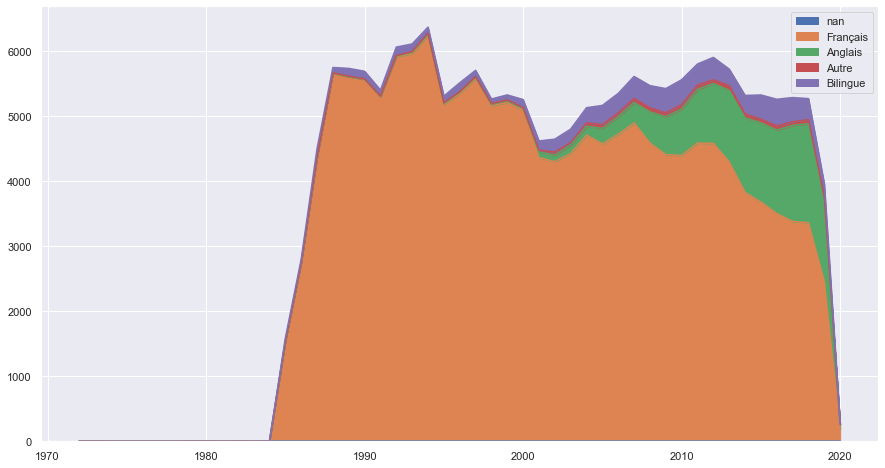

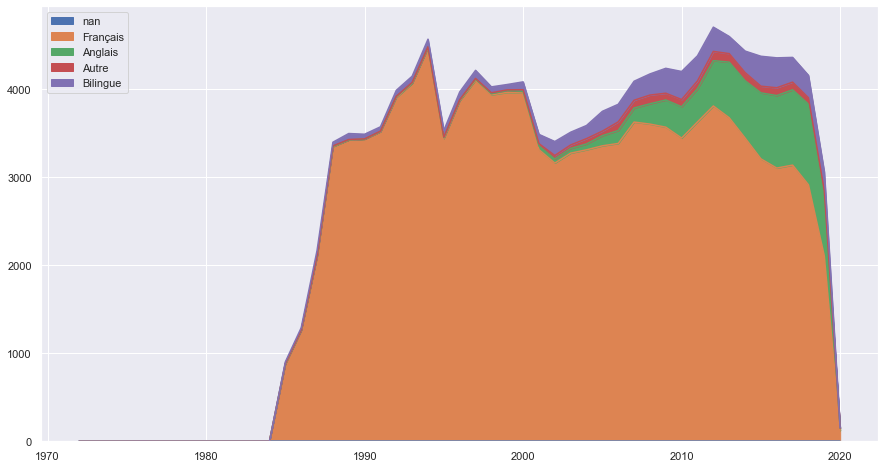

In [105]:
Evo_male_plot_lang.plot.area()
Evo_female_plot_lang.plot.area()
plt.show()